In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\gabri\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [8]:
assets = ['ABEV3.SA', 'ITUB4.SA']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [9]:
pf_data.head()

,ABEV3.SA,ITUB4.SA
Date,,
2010-01-04,2.582460,12.356994
2010-01-05,2.597651,12.437083
2010-01-06,2.624151,12.329328
2010-01-07,2.636473,12.203041
2010-01-08,2.631408,12.018242


In [10]:
pf_data.tail()

,ABEV3.SA,ITUB4.SA
Date,,
2020-06-25,14.18,26.134588
2020-06-26,13.95,25.694847
2020-06-29,14.26,26.464394
2020-06-30,14.14,25.435001
2020-07-01,14.36,25.450001


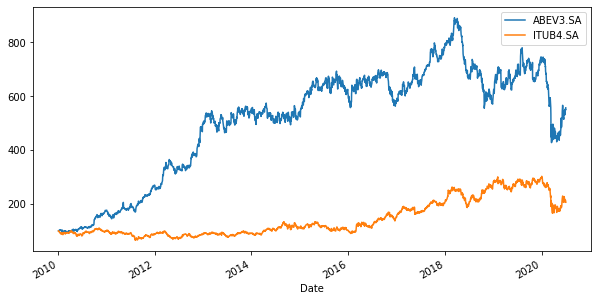

In [11]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [12]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [13]:
log_returns.mean() * 250

ABEV3.SA    0.165417
ITUB4.SA    0.062233
dtype: float64

In [14]:
log_returns.cov() * 250

,ABEV3.SA,ITUB4.SA
ABEV3.SA,0.068433,0.035006
ITUB4.SA,0.035006,0.100212


In [15]:
log_returns.corr()

,ABEV3.SA,ITUB4.SA
ABEV3.SA,1.000000,0.421607
ITUB4.SA,0.421607,1.000000


In [16]:
num_assets = len(assets)

In [17]:
num_assets

2

In [18]:
arr = np.random.random(2)
arr

array([0.41883665, 0.59401252])

In [19]:
arr[0] + arr[1]

1.012849174010863

In [21]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.14865968, 0.85134032])

In [22]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [23]:
np.sum(weights * log_returns.mean()) * 250

0.07757269143443148

Expected Portfolio Variance:

In [24]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.08300510644013517

Expected Portfolio Volatility:

In [25]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.288106068037685

***

In [26]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.08116765240492325,
  0.14327152554566375,
  0.1517592829069879,
  0.1247529219121236,
  0.13408414798433732,
  0.12076338331051295,
  0.11646632300440363,
  0.12236797211943094,
  0.1138659631407882,
  0.1154134387940453,
  0.10408681193409744,
  0.11730169765803457,
  0.11973929345506076,
  0.09148075305064728,
  0.10071101903092795,
  0.102509560374872,
  0.09814143602285884,
  0.1011323575647635,
  0.13413770824887986,
  0.11204624018834387,
  0.08389993495462571,
  0.09744077026589759,
  0.09581230857551544,
  0.12179311684612398,
  0.13510468687565041,
  0.12697017387048054,
  0.06969632440257677,
  0.1053397494022228,
  0.08574510032426104,
  0.14420182588985814,
  0.11997887401755306,
  0.11460786223014233,
  0.1471775089188941,
  0.13322291311138246,
  0.11979496072961962,
  0.10225785274948032,
  0.11883154110938167,
  0.1477768812953255,
  0.1343697205675217,
  0.11256324330416478,
  0.14911849827522086,
  0.11304304910591656,
  0.11884546010207853,
  0.13008466134197696,

In [27]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.1156781 , 0.11268161, 0.127635  , 0.10419145, 0.16070598,
        0.12864776, 0.14104385, 0.14202388, 0.14075797, 0.0780171 ,
        0.11734923, 0.06911621, 0.11564037, 0.10956409, 0.06835347,
        0.11483662, 0.13726576, 0.10898221, 0.14228241, 0.10984001,
        0.08962565, 0.06728864, 0.14399604, 0.13924157, 0.10369171,
        0.10972439, 0.08153935, 0.13033335, 0.08363966, 0.12716695,
        0.13669456, 0.14997497, 0.10170449, 0.10304872, 0.09253278,
        0.13063088, 0.07463243, 0.12349384, 0.10218192, 0.12759483,
        0.07331662, 0.09377513, 0.09035867, 0.11695223, 0.11242786,
        0.129925  , 0.1270751 , 0.10654363, 0.15628387, 0.1229571 ,
        0.09753681, 0.08788798, 0.0932453 , 0.14319573, 0.13300734,
        0.11223992, 0.08172485, 0.09916692, 0.11517858, 0.07182778,
        0.11584131, 0.06543778, 0.09409748, 0.07766481, 0.13842574,
        0.16374688, 0.12008366, 0.06378371, 0.11089981, 0.14314971,
        0.09833262, 0.08766625, 0.11033899, 0.11

In [28]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [29]:
portfolios.head()

,Return,Volatility
0,0.115678,0.243157
1,0.112682,0.245008
2,0.127635,0.239119
3,0.104191,0.251975
4,0.160706,0.256098


In [30]:
portfolios.tail()

,Return,Volatility
995,0.122106,0.240310
996,0.120183,0.240999
997,0.076271,0.290338
998,0.128263,0.239058
999,0.085762,0.274961


Text(0, 0.5, 'Expected Return')

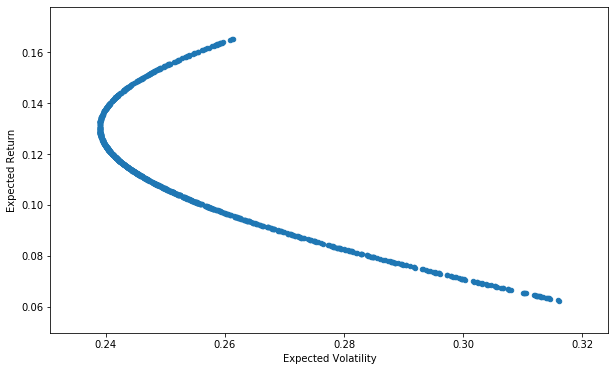

In [31]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')